# Customer Churn Analysis





![](https://miro.medium.com/proxy/1*osC29H34Bw19gqYFc6FWcA@2x.jpeg )



Churn is one of the biggest problems not only in the telecom industry but also in several other industries like gaming, credit card, cable service providers and many more. Using the 'Telecom Churn Prediction' dataset we shall go over some of the main reasons why customer churn happens and also build a model to predict if a customer will churn or not.

#### What is Customer Churn?
Customer churn is the percentage of customers your business lost in a set period of time.

For instance, if you had 100 customers at the beginning of the month, and lost 10 of them throughout the month, you had a 10% churn rate for the month. Once a customer cancels their account or stops paying for their subscription, they’ve “churned”. The more customers retained, the lower your churn rate.

The higher the churn rate, the more difficult it is to grow because you’ll constantly be chasing new customers to replace the ones that are churning. To build sustainable growth, you need to keep your churn rate as low as possible while you acquire new customers. One thing to keep in mind though, is that every business has some customer churn. A product won’t always be the right fit for everyone, but its alright as long as the company does everything to keep your churn as low as possible.

Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.

Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.

### **Data Dictionary**

1. **`CustomerID`**: A unique ID that identifies each customer.

2. **`Gender`**: The customer’s gender: (Male, Female)

3. **`Age`**: The customer’s current age, in years, at the time the fiscal quarter ended.

4. **`Senior Citizen`**: Indicates if the customer is 65 or older: (Yes, No)

5. **`Married (Partner)`**: Indicates if the customer is married: (Yes, No)

6. **`Dependents`**: Indicates if the customer lives with any dependents: (Yes, No)

7. **`Number of Dependents`**: Indicates the number of dependents that live with the customer.

8. **`Phone Service`**: Indicates if the customer subscribes to home phone service with the company: (Yes, No)

9. **`Multiple Lines`**: Indicates if the customer subscribes to multiple telephone lines with the company:(Yes, No)

10. **`Internet Service`**: Indicates if the customer subscribes to Internet service with the company: (DSL, Fiber Optic)

11. **`Online Security`**: Indicates if the customer subscribes to an additional online security service provided by the company: (Yes, No)

12. **`Online Backup`**: Indicates if the customer subscribes to an additional online backup service provided by the company: (Yes, No)

13. **`Device Protection Plan`**: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: (Yes, No)

14. **`Premium Tech Support`**: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: (Yes, No)

15. **`Streaming TV`**: Indicates if the customer uses their Internet service to stream television programing from a third party provider: (Yes, No) The company does not charge an additional fee for this service.

16. **`Streaming Movies`**: Indicates if the customer uses their Internet service to stream movies from a third party provider: (Yes, No) The company does not charge an additional fee for this service.

17. **`Contract`**: Indicates the customer’s current contract type: (Month-to-Month, One Year, Two Year)

18. **`Paperless Billing`**: Indicates if the customer has chosen paperless billing: (Yes, No)

19. **`Payment Method`**: Indicates how the customer pays their bill: (Bank Withdrawal, Credit Card, Mailed Check)

20. **`Monthly Charge`**: Indicates the customer’s current total monthly charge for all their services from the company.

21. **`Total Charges`**: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

22. **`Tenure`**: Indicates the total amount of months that the customer has been with the company.

23. **`Churn`**: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

Reference:
https://www.kaggle.com/blastchar/telco-customer-churn


## A) Dataset

Lets start by importing libraries that we shall need

In [88]:
#EDA Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

#Model Building Libraries
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
#Parameters for plots
rcParams['figure.figsize'] = 8,6
sns.set_style('darkgrid')
rcParams['axes.titlepad']=15
RB = ["#123ea6", "#e63707"]
sns.set_palette(RB)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Loading the dataset

In [89]:
path = '/content/Customer-Churn.csv'
df_base= pd.read_csv(path)

Checking the head and attributes of the dataset

In [90]:
df_base.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [91]:
df_base.shape

(7043, 21)

In [92]:
df_base.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [93]:
df_base.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [94]:
df_base.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


We can conclude that:
1. 75% of the customers have tenure less than 55 months
2. The mean tenure is around 32 months
3. The mean monthly charges are roughly around 64.76 USD and 25% customers pay more than 89.85 USD


Text(0.5, 1.0, 'No of Churned Customers')

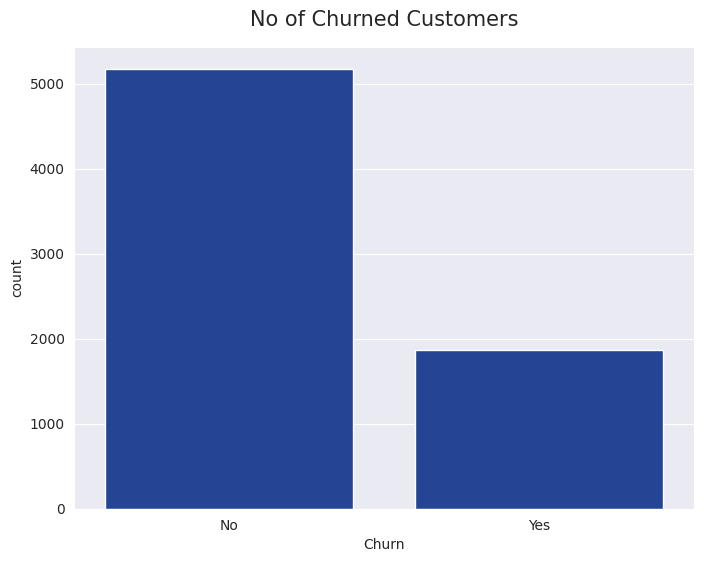

In [95]:
sns.countplot(x=df_base['Churn'])
plt.title('No of Churned Customers',fontsize=15)

In [96]:
df_base['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


As the distribution of data is not around 50:50 we can say that it is an 'Imbalanced Dataset'

Now lets check if any missing values exist in our dataset

In [97]:
df_base.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [98]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Seems like there are no missing values here.... But wait theres a catch!!!

We can see that majority of the columns are of datatype objects. Hence we should convert them into either float or integer values to really know if any null values exist. We can use the to_numeric method to do so.

In [99]:
df= df_base.copy()
df['TotalCharges']=pd.to_numeric(df_base['TotalCharges'],errors='coerce') #coerce puts NaN values if there are any parsing errors
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


As we can see now there are 11 missing values from the TotalCharges colums. Lets check these records

In [100]:
df[df.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


As we can see from the above dataframe the customers who have tenure equal to 0 are the ones with blank values in the TotalCharges column. Lets quickly check the dataframe where the tenure is 0

In [101]:
df[df['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


As both the dataframes match we can conclude that values are missing due to the fact that the customer has not yet paid anything to the company as they are new and hence none of them churned yet.

Since the percentage of these records compared to the dataset is very low (~0.156%), it is safe to drop them as they wont have a very large impact.

In [102]:
#Dropping the null values
df.dropna(inplace=True)

In [103]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [105]:
df1=df.copy()

df1.drop(['customerID'],axis=1,inplace=True)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Tenure is a specific number and to visualize them would be difficult. Hence we will divide them into bins and assign them into groups. For e.g. tenure < 12 months then assign a group of 1-12 months as 0-1 years, for 13-24 assign group as between 1-2 years and so on...




In [106]:
df['tenure'].max() #The max tenure is 72 months or 6 years

72

In [107]:
# Group the tenures in bins of 12 months
labels = ["{0} - {1}".format(i,i+11) for i in range (1,72,12)]
df['tenure_group'] = pd.cut(df['tenure'], range(1,80,12), right=False, labels=labels)

In [108]:
df['tenure_group'].value_counts()

,count
tenure_group,
1 - 12,2175
61 - 72,1407
13 - 24,1024
25 - 36,832
49 - 60,832
37 - 48,762


<Axes: xlabel='tenure_group', ylabel='count'>

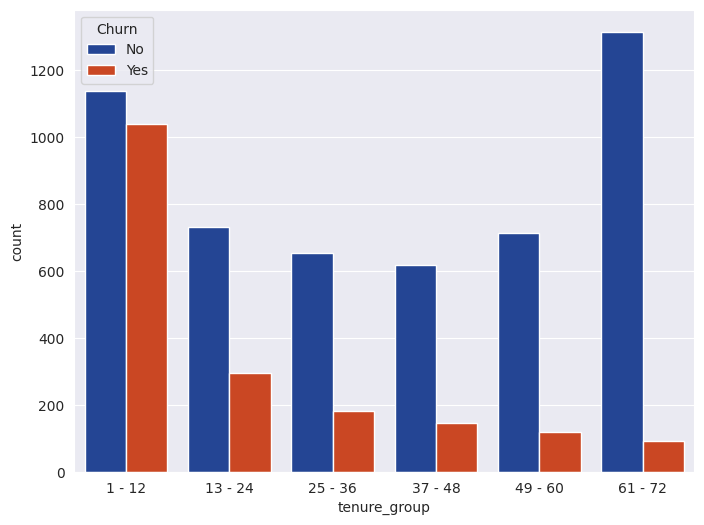

In [109]:
sns.countplot(x=df['tenure_group'],hue='Churn',data=df)

We can notice that customers who have tenure less than a year are the ones who are most likely to churn whereas the clients who have been with the company the longest are very less likely to churn. Also the number of customers with a monthly tenure is higher than others.

Now, lets remove the tenure column now as we have already transformed it into tenure_group

Lets drop the tenure and customerID columns as it is not of much use for data analysis and model training

In [110]:
df.drop(['customerID','tenure'],axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## B) Exploratory Data Analysis

### Univariate Analysis

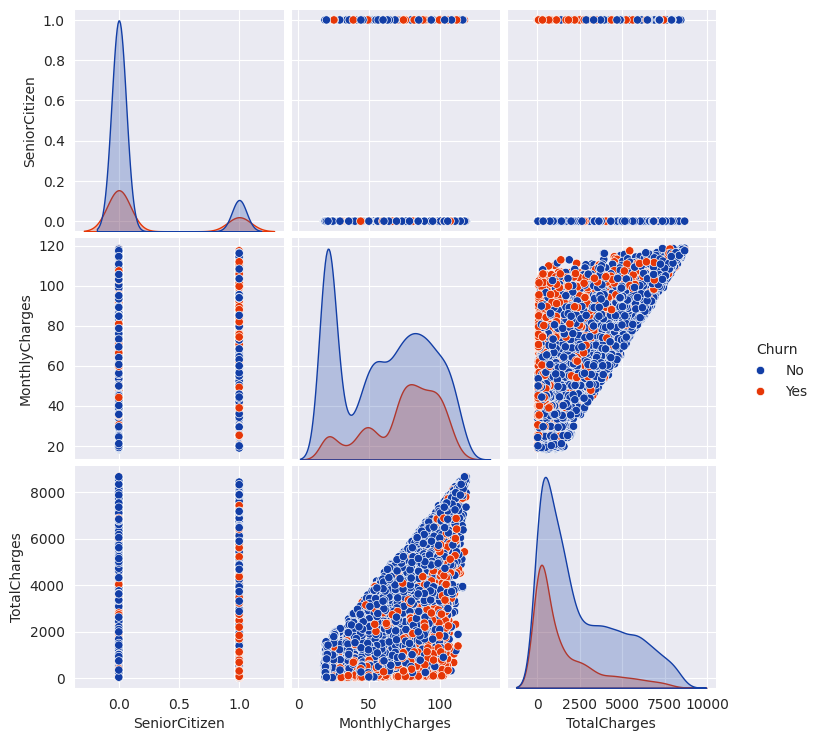

In [111]:
sns.pairplot(df,hue='Churn')

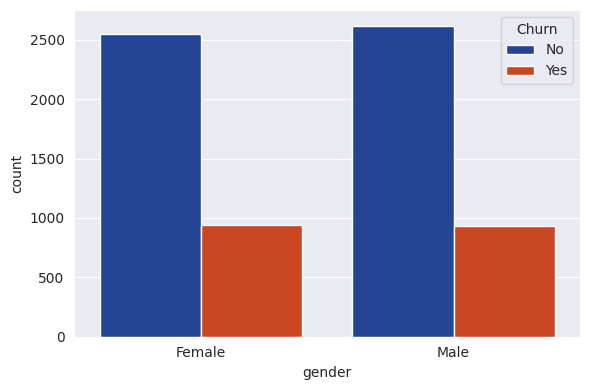

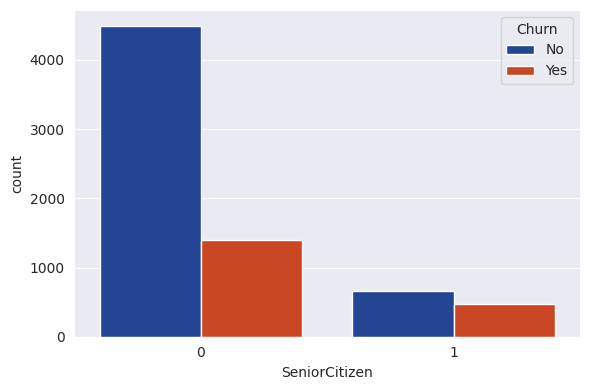

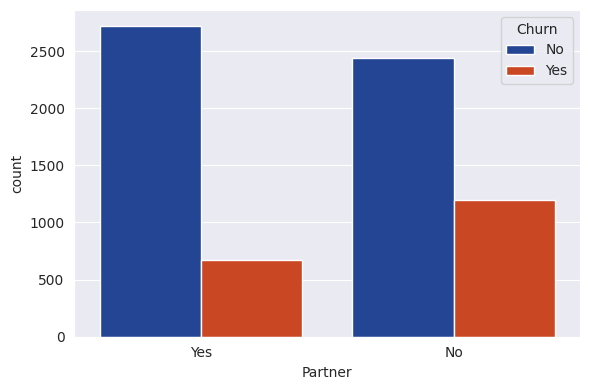

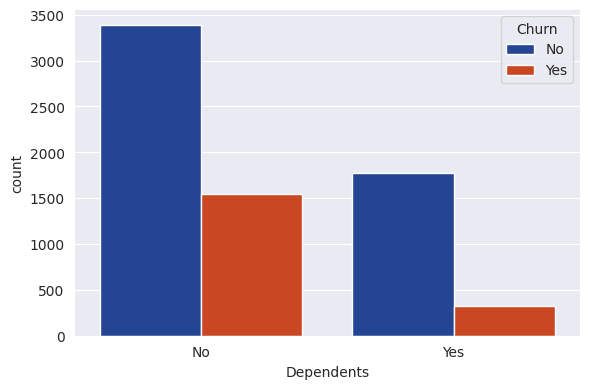

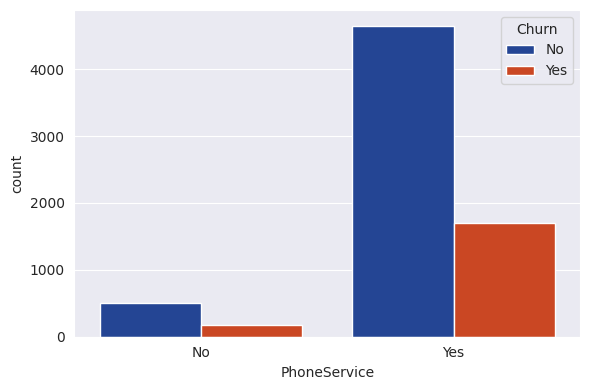

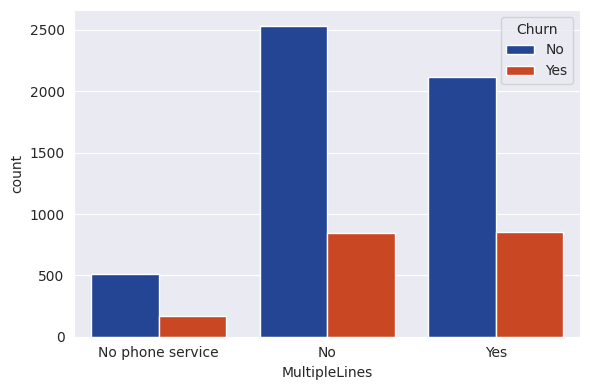

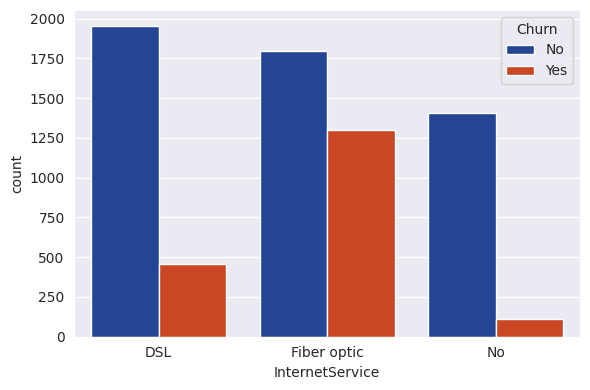

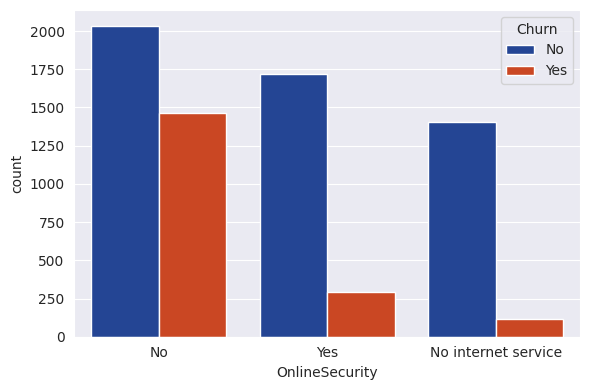

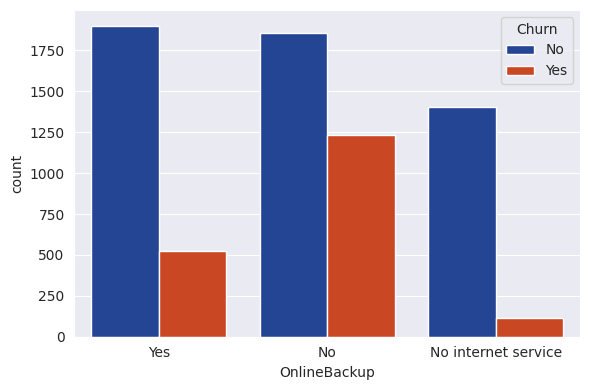

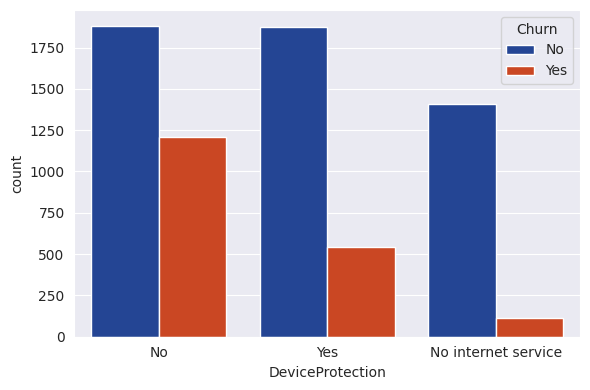

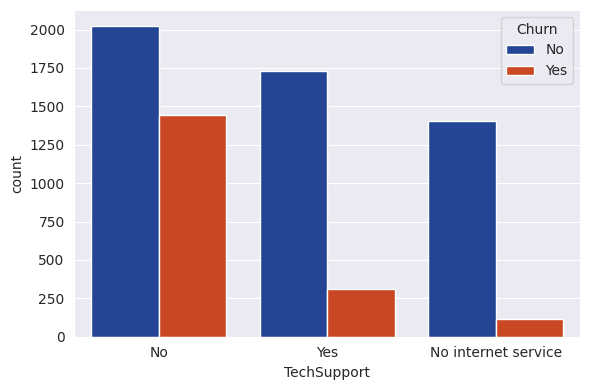

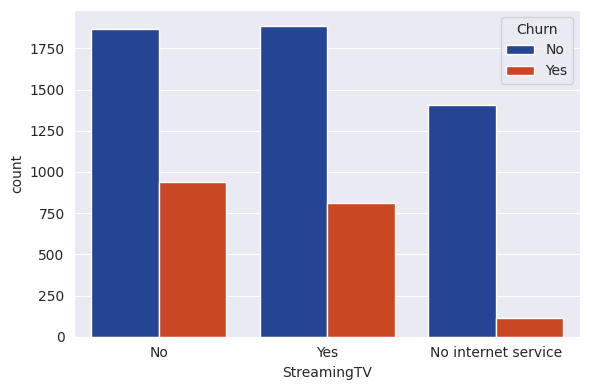

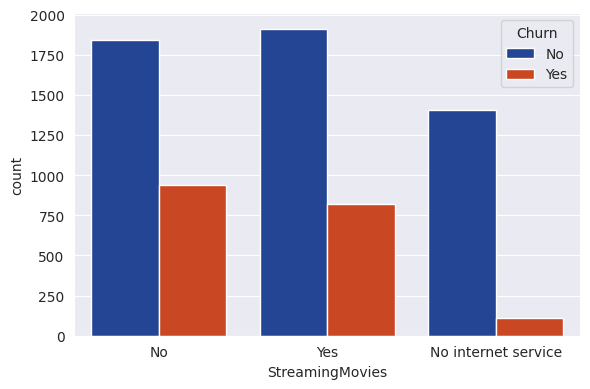

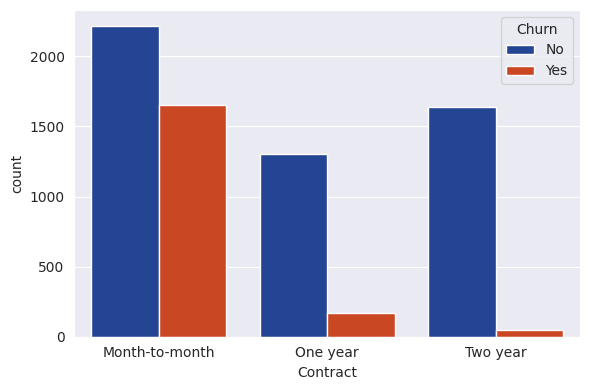

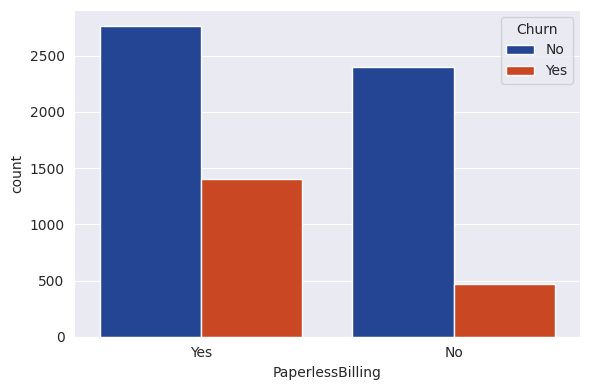

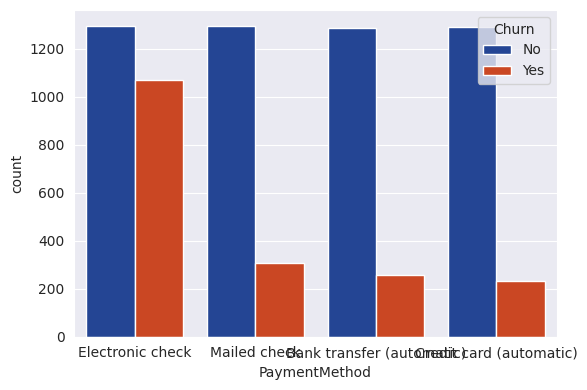

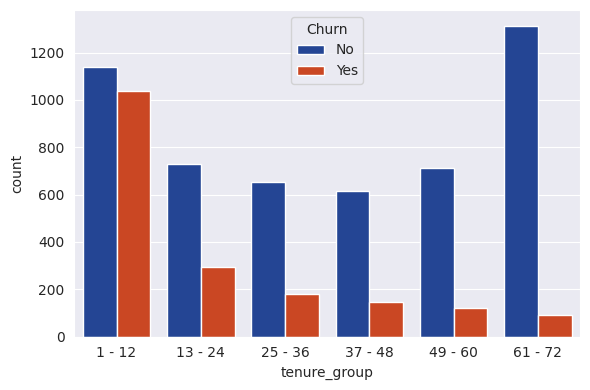

In [112]:
#Plotting the countplot of all important columns to gain insights
for i, predictor in enumerate(df.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i,figsize=(6,4))
    sns.countplot(data=df,x=predictor,hue='Churn')
    plt.tight_layout()

#### Observations:

1. **`Gender`** - The ratio is almost similar hence gender is not an important feature standalone but when combined will be of importance.
2. **`SeniorCitizen`** - Ratio of churners in Senior citizens is very high. If the customers are a Senior Citizen they are more likely to churn.
3. **`Partner`** - Customers with partners they are more likely to churn
4. **`Dependents`** - Customers with dependents they are less likely to churn
5. **`PhoneService`** - Customers with Phone Service are are more likely to churn
6. **`MultipleLines`** - Not much of an effect
7. **`InternetService`** Customers with Fiber optic as their service are more likely to churn probably due to high costs
8. **`OnlineSecurity`** Customers with Online Security are very less likely to churn than ones who dont have Online Security
9. **`OnlineBackup`** - Customers with OnlineBackup are less likely to churn
10. **`TechSupport`** - Customers with DeviceProtection are less likely to churn
11. **`StreamingTV/StreamingMovies`** - Not much of a effect as company doesn't charge an additional fee for these
12. **`Contract`** - Customers with contract of one year or more are very less likely to churn
12. **`PaperlessBilling`** - Not much of an effect
13. **`PaymentMethod`** - Customers who have paid through electronic check are very likely to churn and ones who paid through credit card are very less likely to churn
13. **`tenure_group`** - Customers who have tenure less than a year are the ones who are most likely to churn whereas the clients who have been with the company the longest are very less likely to churn

Now lets convert the target variable Churn into a binary numeric value i.e Yes=1, No=0

In [113]:
df['Churn'].replace(["Yes","No"], [1,0],inplace=True)

/tmp/ipython-input-2363769137.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'].replace(["Yes","No"], [1,0],inplace=True)


Let's also convert all the categorical variables into dummy variables

In [114]:
#One Hot Encoding
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,True,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,False,True,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False


In [115]:
100*df[df['SeniorCitizen']==1].shape[0]/df.shape[0]

16.24004550625711

There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.

Now lets check out the pairplot

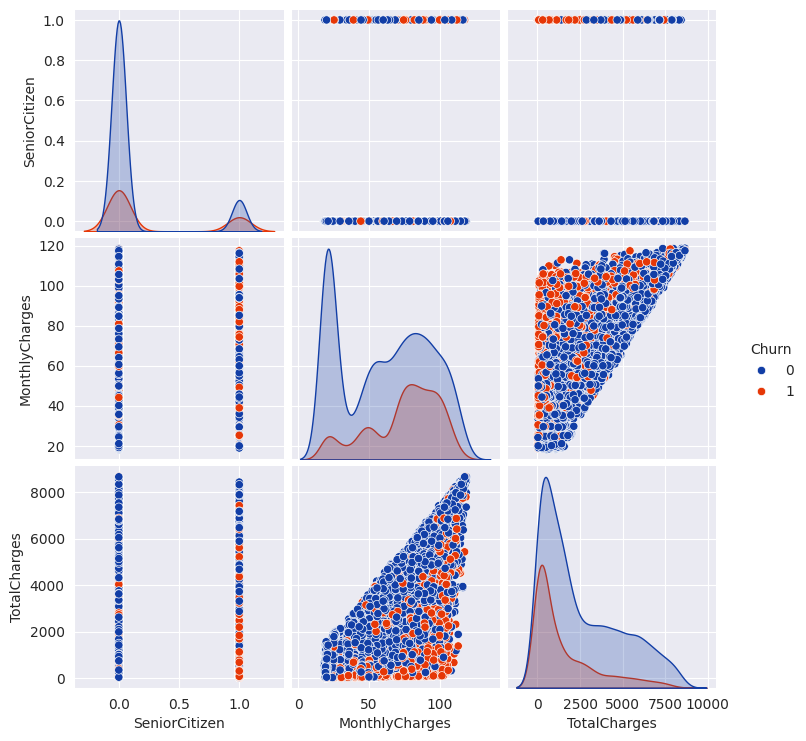

In [116]:
sns.pairplot(df,hue='Churn')

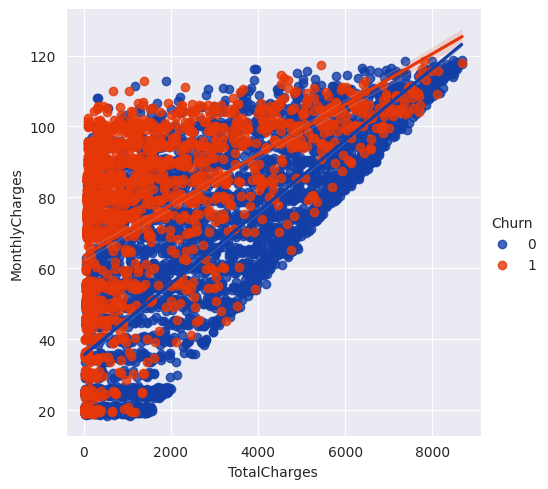

In [117]:
sns.lmplot(x='TotalCharges',y='MonthlyCharges',data=df,hue='Churn')

We can see that there is a relationship between MonthlyCharges and TotalCharges. TotalCharges Increases as Monthly Charges increases as expected. Now lets check out the kdeplot of MonthlyCharges and TotalCharges

/tmp/ipython-input-2120818580.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_dummies,x='MonthlyCharges',hue='Churn',shade=True)


<Axes: xlabel='MonthlyCharges', ylabel='Density'>

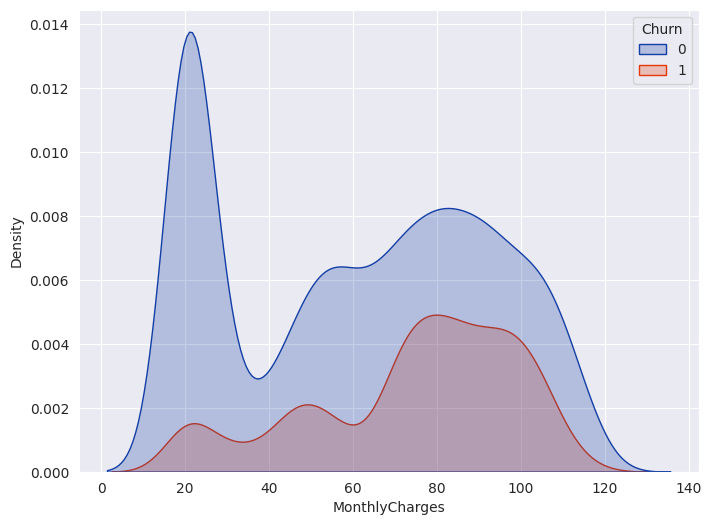

In [118]:
sns.kdeplot(data=df_dummies,x='MonthlyCharges',hue='Churn',shade=True)

/tmp/ipython-input-77734118.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_dummies,x='TotalCharges',hue='Churn',shade=True)


<Axes: xlabel='TotalCharges', ylabel='Density'>

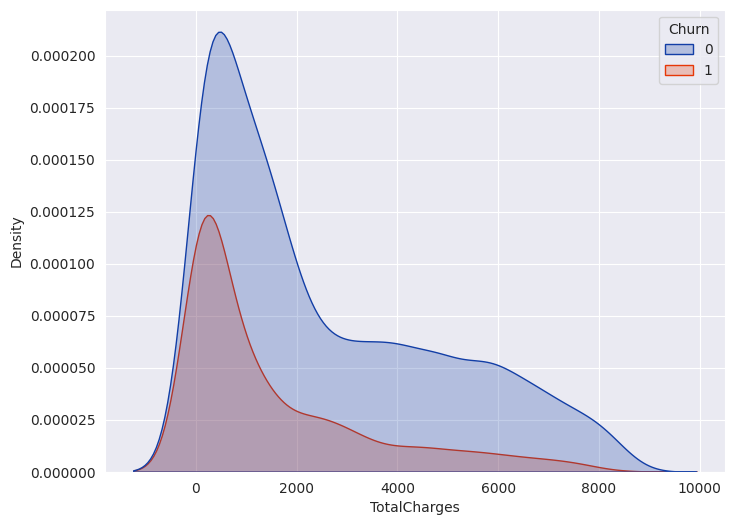

In [119]:
sns.kdeplot(data=df_dummies,x='TotalCharges',hue='Churn',shade=True)

We find that the Customers are more likely to churn for lower monthly and total charges...Why is that?


/tmp/ipython-input-3869418282.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_dummies,x='MonthlyCharges',hue='tenure_group_1 - 12',shade=True)


<Axes: xlabel='MonthlyCharges', ylabel='Density'>

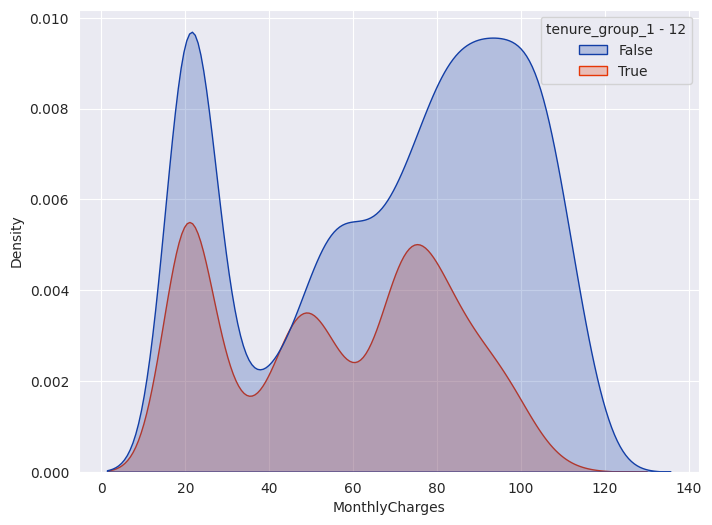

In [120]:
sns.kdeplot(data=df_dummies,x='MonthlyCharges',hue='tenure_group_1 - 12',shade=True)

/tmp/ipython-input-1782551358.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_dummies,x='TotalCharges',hue='tenure_group_1 - 12',shade=True)


<Axes: xlabel='TotalCharges', ylabel='Density'>

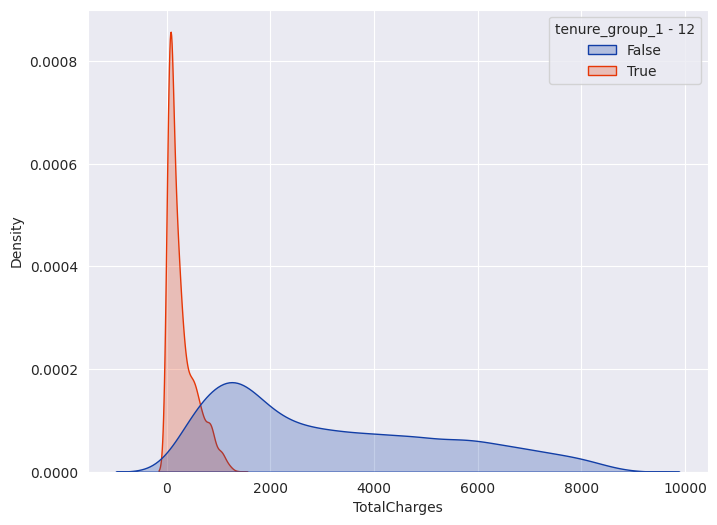

In [121]:
sns.kdeplot(data=df_dummies,x='TotalCharges',hue='tenure_group_1 - 12',shade=True)

We can see that people having a shorter tenure are the ones who are likely to churn and their Total charges will always be less due to their short tenures. Similarly, Low Monthly Charges users tend to churn becase they maybe trying the service and will churn if they find some other service
***

Lets see if the internet service plays a role in churning or not

<Axes: xlabel='InternetService', ylabel='MonthlyCharges'>

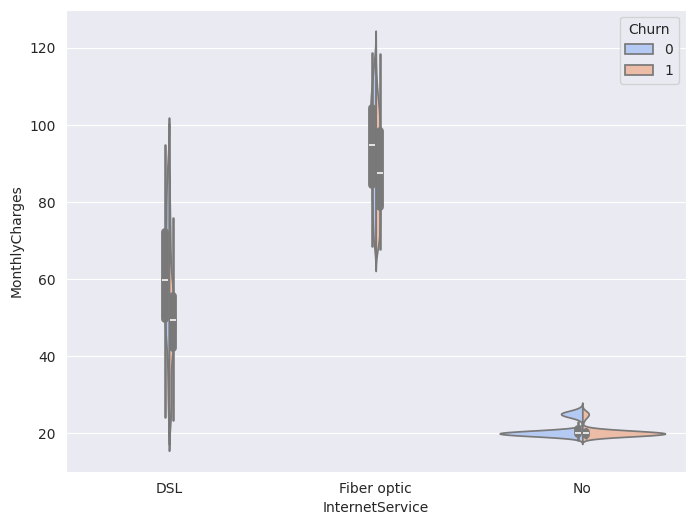

In [122]:
sns.violinplot(
    x="InternetService",
    y="MonthlyCharges",
    hue="Churn",
    split=True,
    palette="coolwarm",
    data=df
)


Customers with fiber optic (fast connection) are more probable to churn than those with DSL connection (slower connection) as their service.<br>
Also we can also observe that customers with DSL with higher charges are less probable to churn but the ones with lesser charges (~ 40-60 USD) are more likely to churn
***

Now Lets check the additional services offered by the company

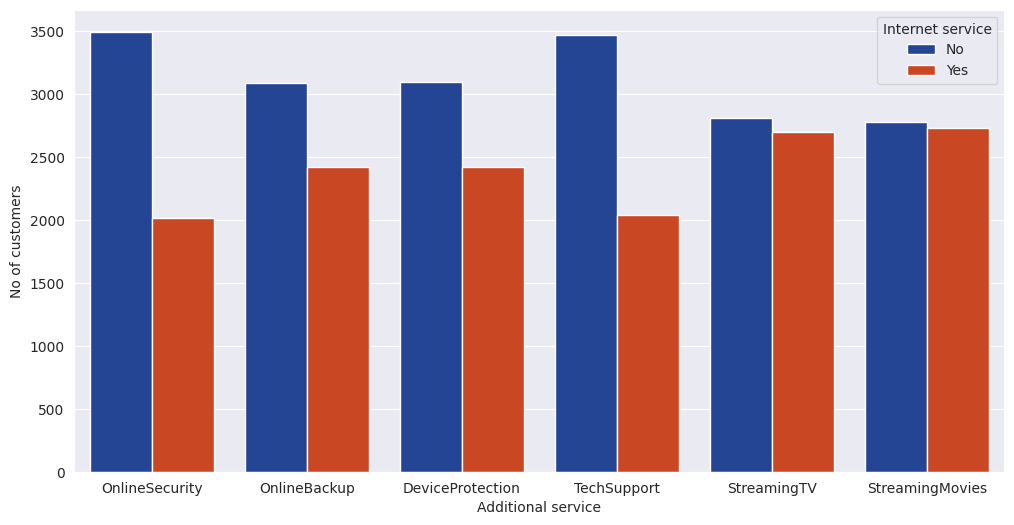

In [123]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df_service = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Internet service'}, axis=1)
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_service, x='variable', hue='Internet service')
ax.set(xlabel='Additional service', ylabel='No of customers')
plt.show()

Lets check the correlations of Churn with other features

Text(0.5, 1.0, 'Positive Correlation')

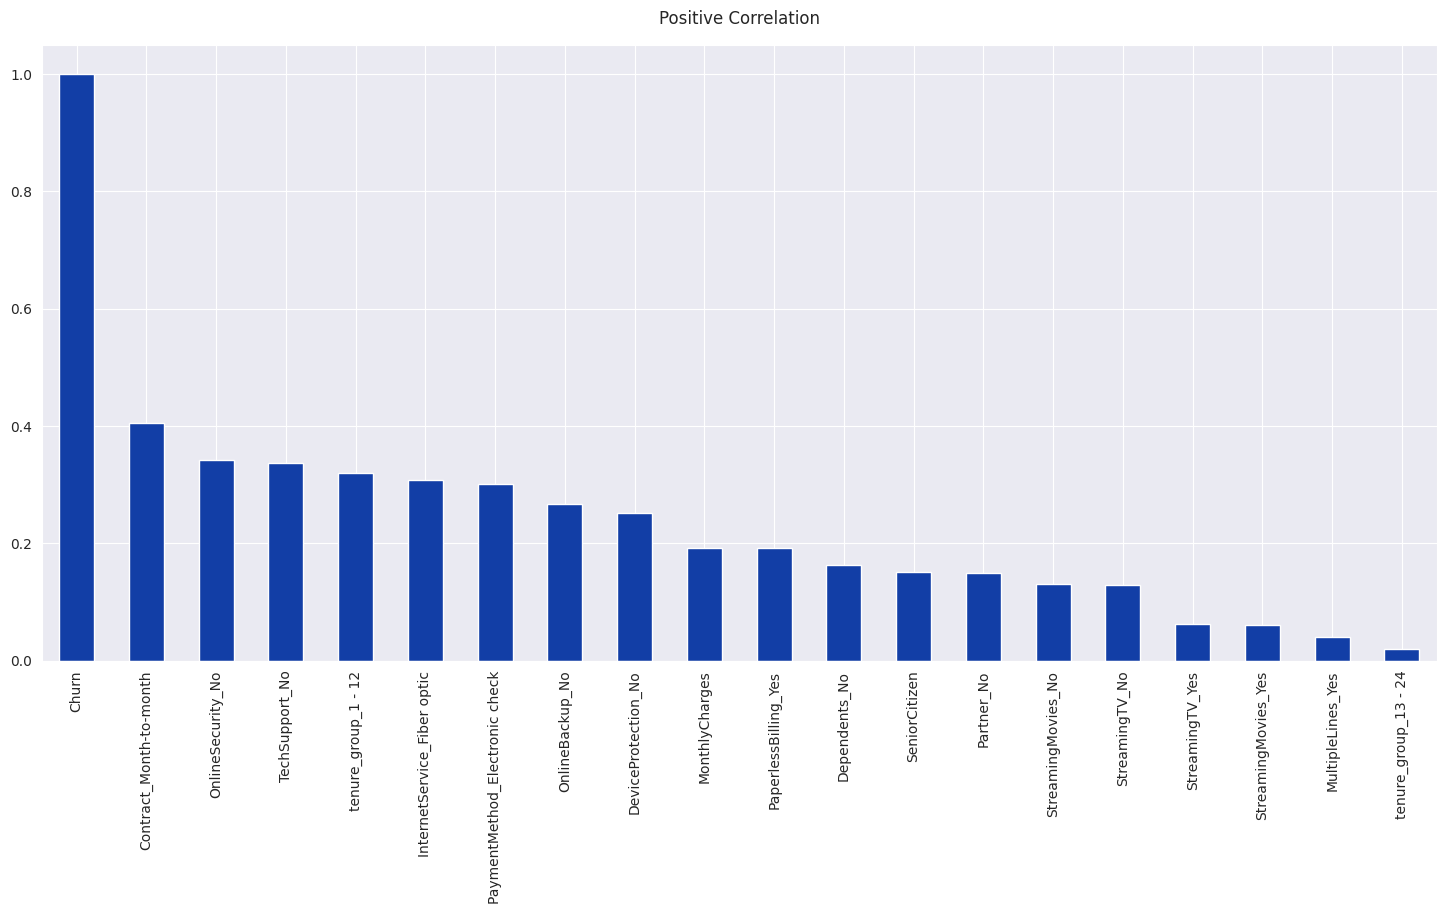

In [124]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(18,8))
df_dummies.corr()['Churn'].sort_values(ascending = False)[:20].plot(kind='bar')
plt.title('Positive Correlation')

Text(0.5, 1.0, 'Negative Correlation')

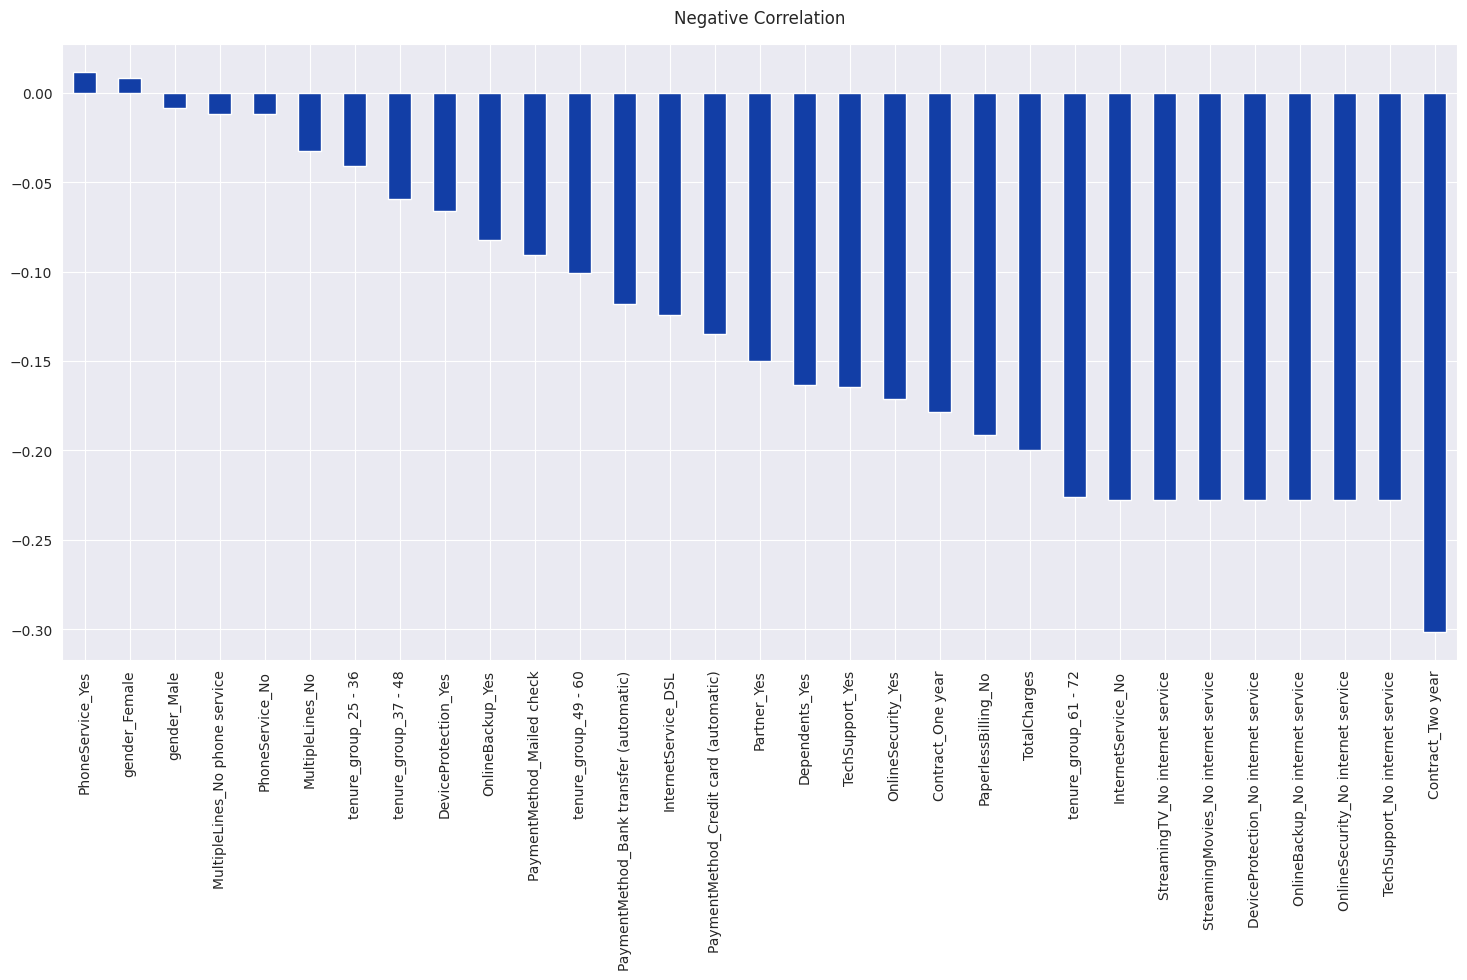

In [125]:
plt.figure(figsize=(18,8))
df_dummies.corr()['Churn'].sort_values(ascending = False)[20:].plot(kind='bar')
plt.title('Negative Correlation')

<Axes: >

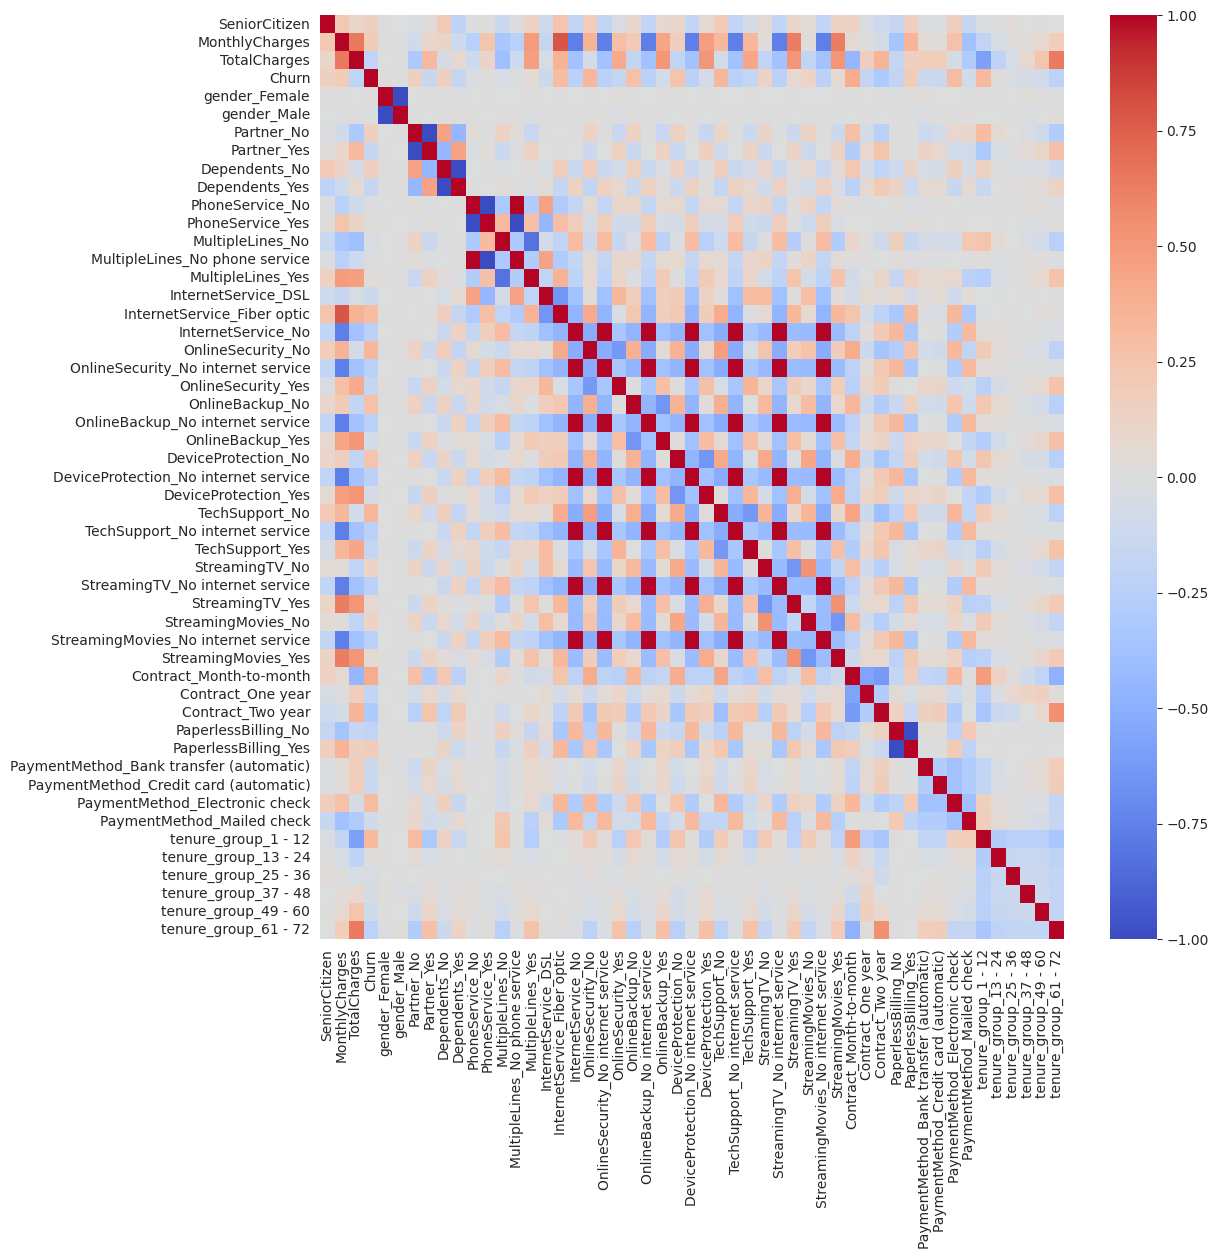

In [126]:
plt.figure(figsize=(12,12))
sns.heatmap(df_dummies.corr(),cmap='coolwarm')

#### Insights:
From these correlation diagrams we can observe the following things:


1. **High Churn**: Seen in cases of *Month-to-Month Contacts, No Online Security, No Tech Support, First Year of Subscription and Fibre Optics Internet service*

2. **Low Churn**: Seen in cases of *Long term Contacts, Subscriptions without Internet Service, and tenure of 5+ years*

3. **Little to no Impact** : Some cases like *Mutiple Lines, Availability of Phone service and Gender* have little to no impact on Churn on their own

### Bivariate Analysis

To do this lets seperate our database intro two categories- Churners and Non-Churners

In [127]:
churners_df = df.loc[df_dummies['Churn']==1]
non_churners_df = df.loc[df_dummies['Churn']==0]
churners_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12
5,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,1 - 12
8,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,25 - 36
13,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,49 - 60


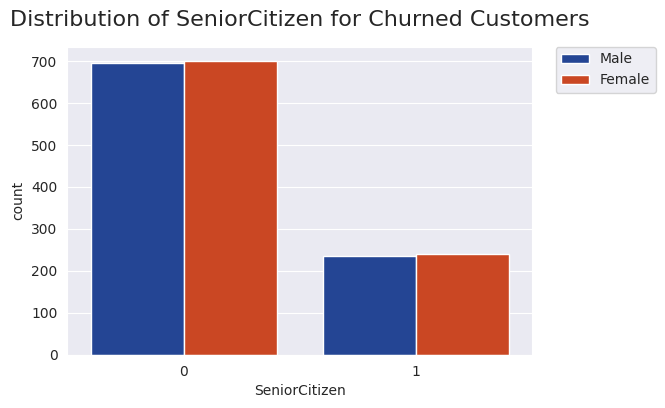

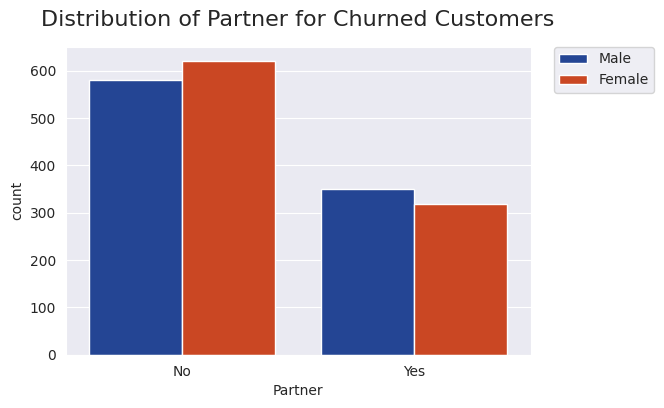

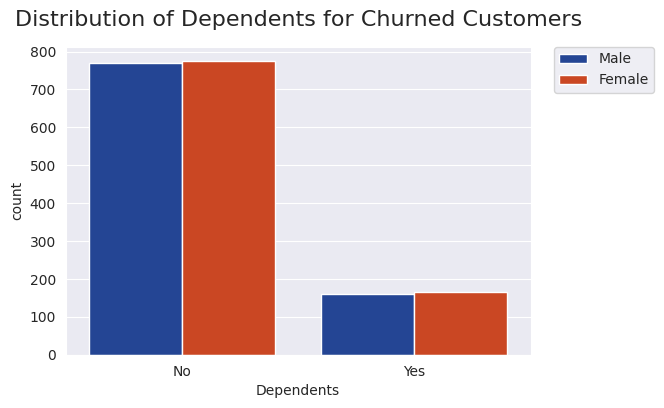

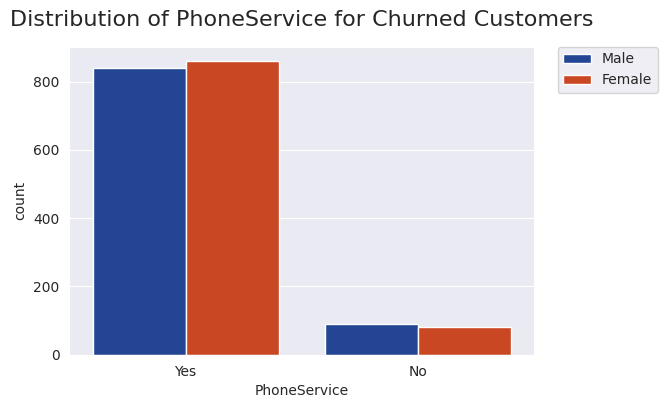

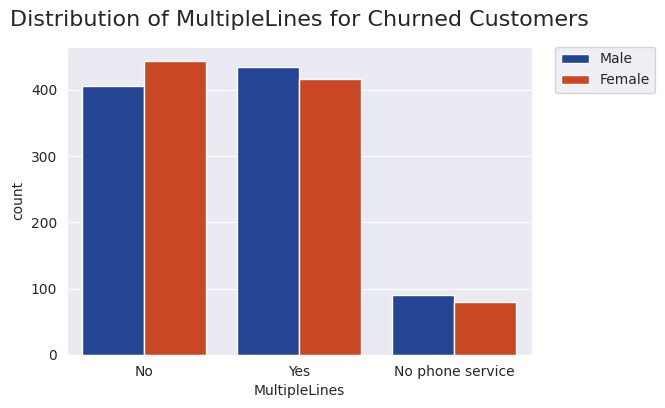

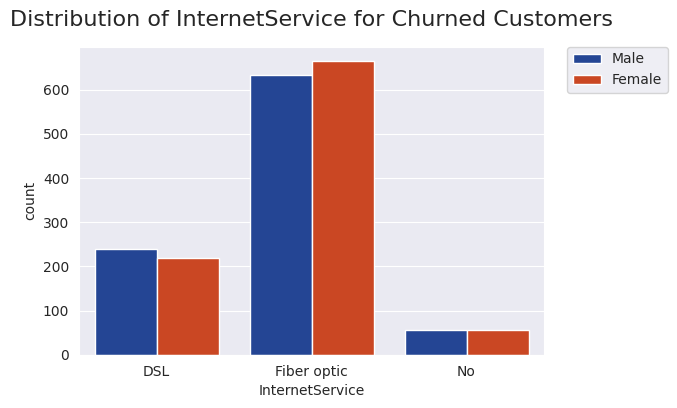

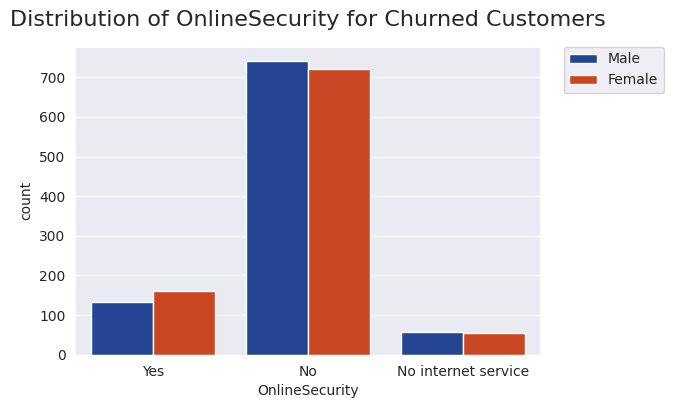

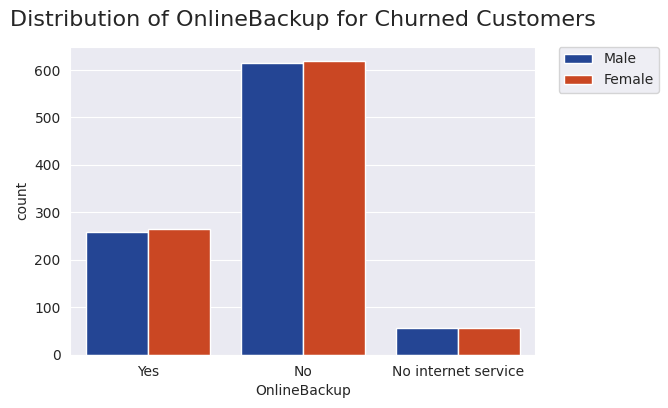

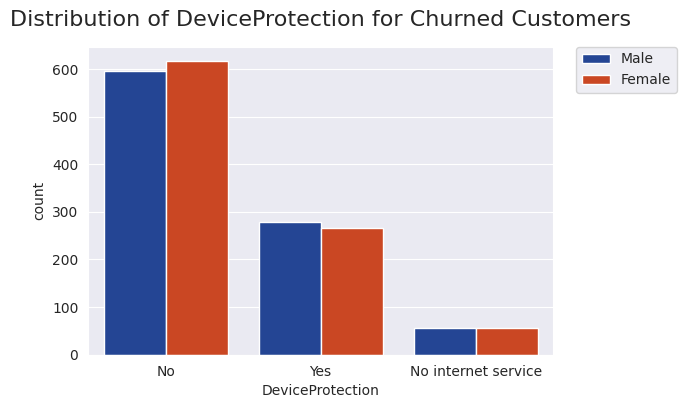

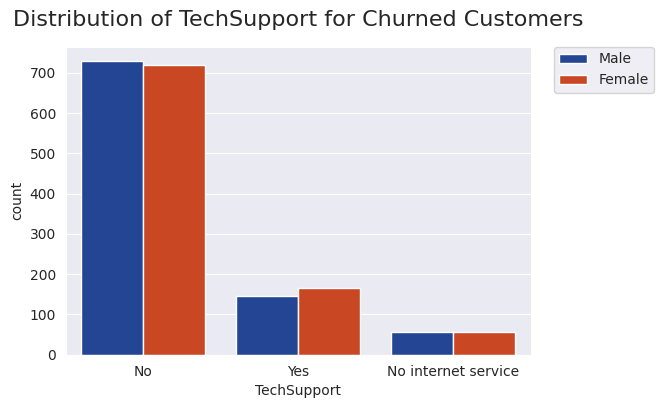

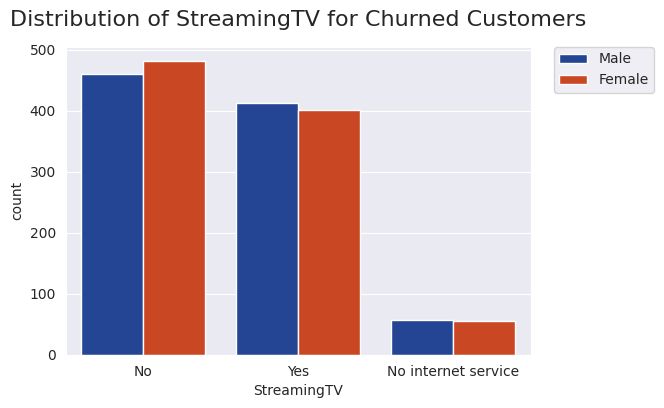

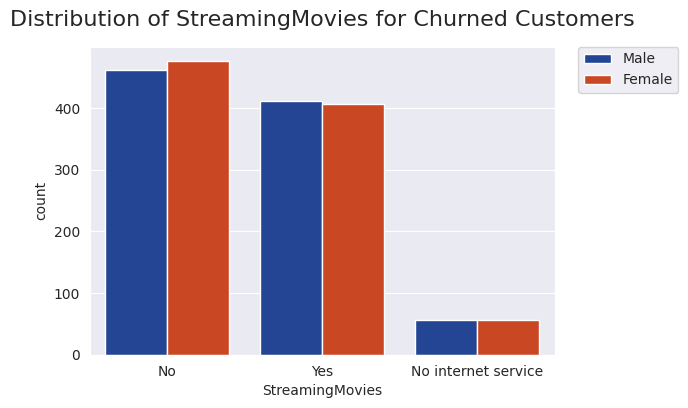

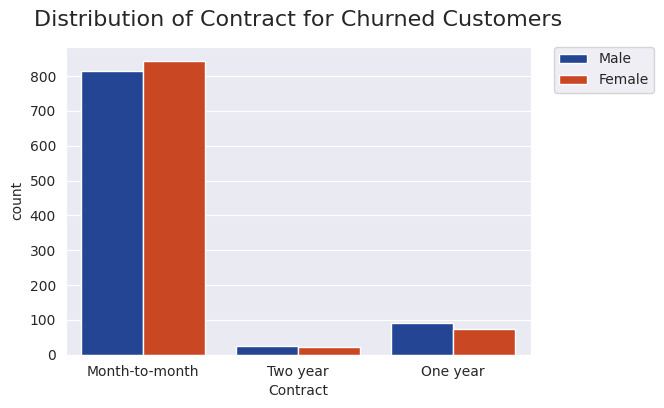

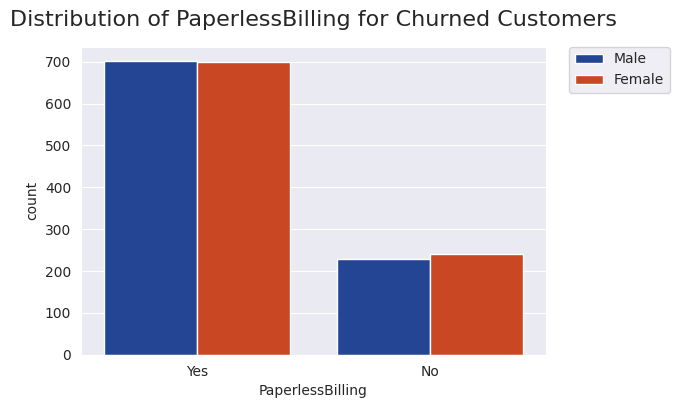

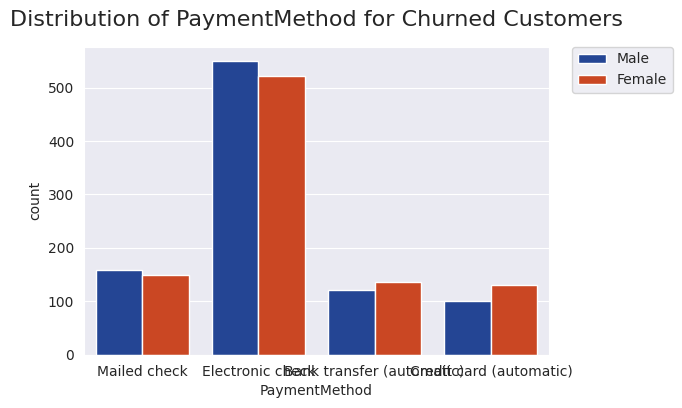

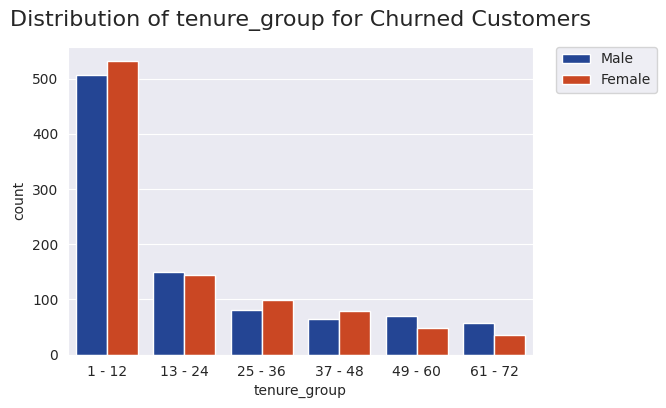

In [128]:
#Plotting the countplot of all important columns to gain insights


for i, predictor in enumerate(churners_df.drop(columns=['Churn','TotalCharges','MonthlyCharges','gender'])):
    plt.figure(i,figsize=(6,4))
    plt.title("Distribution of {} for Churned Customers".format(predictor),fontsize='16')
    sns.countplot(data=churners_df,x=predictor,hue='gender')
    plt.tight_layout
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Observations

1. Gender doesnt seem to have that much of an effect on Churning in customers.
2. Few insights we can gain from this is that female customers are a little more likely to churn than male customers if their tenure is less than a year, but are less likely to churn than male customers for long tenures.
3. Female customers are more likely to churn than male customer if their payment method is Credit Card.


### Conclusion from EDA


1. Short term contracts have higher churn rates.
2. Month to month contract is more likely opted by customers but has the greatest impact on the Churn rate (increases likelihood to churn by 6.31x).
3. Customers with a two yearly contract have a very low churn rate.
3. People with higher tenure are very less likely to churn as compared to shorter tenure (1 year).
3. The customers who pay through electronic checks have higher churn rate whereas the ones who pay through credit card have lower churn rate.
4. Customers without an internet service have a very low churn rate.
5. Customers who have Internet service as Fiber Optics as a service are more likely to Churn.
6. Senior Citizens are more likely to churn.
7. Additional features like Security, Backup, Device Protection and Tech Support make the customer less likely to churn.

## C) Training the Model to Predict Churning

Now lets train the model to predict Churning. We will keep tenure in months as the tenure_group column was made for visualization and our models input will be in tenure

Following are the list of algorithms that are used in this notebook.

| Algorithms |
| ----------- |
| Logistic Regression   |
| Decision Tree  |
| Random Forest   |
| PCA     |
| SVM|
| AdaBoost  |
| XGBoost  |
| Neural Network |

In [129]:
df_base =  pd.read_csv(path)
replaceStruct = {"Churn":     {"No": 0, "Yes": 1 }  }
oneHotCols = ["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines"
            ,"InternetService","OnlineSecurity","OnlineBackup",
            "DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
            "Contract","PaperlessBilling","PaymentMethod"]

df2=df_base.replace(replaceStruct, inplace=True)
df2=pd.get_dummies(df_base, columns=oneHotCols)
pd.set_option('display.max_columns',100)
df2.head()

/tmp/ipython-input-1276821636.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2=df_base.replace(replaceStruct, inplace=True)


,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,0,True,False,True,False,False,True,True,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False
1,5575-GNVDE,34,56.95,1889.5,0,False,True,True,False,True,False,True,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True
2,3668-QPYBK,2,53.85,108.15,1,False,True,True,False,True,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True
3,7795-CFOCW,45,42.30,1840.75,0,False,True,True,False,True,False,True,False,True,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,True,False,False,False
4,9237-HQITU,2,70.70,151.65,1,True,False,True,False,True,False,True,False,False,True,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False


In [130]:
df2['TotalCharges']=pd.to_numeric(df_base['TotalCharges'],errors='coerce') #coerce puts NaN values if there are any parsing errors
df2.dropna(inplace=True)
df2=df2.drop('customerID',axis=1)
df2.to_csv(r'Telco-Customer-Predictions.csv')

In [131]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7032 non-null   int64  
 4   gender_Female                            7032 non-null   bool   
 5   gender_Male                              7032 non-null   bool   
 6   SeniorCitizen_0                          7032 non-null   bool   
 7   SeniorCitizen_1                          7032 non-null   bool   
 8   Partner_No                               7032 non-null   bool   
 9   Partner_Yes                              7032 non-null   bool   
 10  Dependents_No                            7032 non-nul

In [132]:
df_dummies= pd.get_dummies(df2)
df_dummies

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,True,False,True,False,False,True,True,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False
1,34,56.95,1889.50,0,False,True,True,False,True,False,True,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True
2,2,53.85,108.15,1,False,True,True,False,True,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True
3,45,42.30,1840.75,0,False,True,True,False,True,False,True,False,True,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,True,False,False,False
4,2,70.70,151.65,1,True,False,True,False,True,False,True,False,False,True,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,False,True,True,False,False,True,False,True,False,True,False,False,True,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False,False,True
7039,72,103.20,7362.90,0,True,False,True,False,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False,True,False,False
7040,11,29.60,346.45,0,True,False,True,False,False,True,False,True,True,False,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False
7041,4,74.40,306.60,1,False,True,False,True,False,True,True,False,False,True,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True


In [133]:
X = df_dummies.drop('Churn',axis=1)
y = df_dummies['Churn']

### a) Decision Tree Classifier


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=3, min_samples_leaf=8)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=8)

In [135]:
y_pred = dt_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [136]:
dt = round(accuracy_score(y_test, y_pred)*100, 2)
dt

77.33

In [137]:
def print_report(model,X_test,y_test,y_pred):
    """
    returns the model score, confusion matrix and classfication report
    """
    print("Model Score : {} \n ".format(model.score(X_test, y_test)))
    print("Confusion Matrix : \n {}\n".format(confusion_matrix(y_test,y_pred)))
    print("Accuracy : {}".format( round(accuracy_score(y_test, y_pred)*100, 2)))
    print("Classification report : \n\n"+classification_report(y_test, y_pred, labels=[0,1]))


In [138]:
print_report(dt_model,X_test,y_test,y_pred)

Model Score : 0.7732764747690121 
 
Confusion Matrix : 
 [[944  65]
 [254 144]]

Accuracy : 77.33
Classification report : 

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1009
           1       0.69      0.36      0.47       398

    accuracy                           0.77      1407
   macro avg       0.74      0.65      0.66      1407
weighted avg       0.76      0.77      0.75      1407



We can see that although f1-score for non churners is high but for our minority class, Churn=1 the f1-score is very low (0.58). Thus the model is not properly created.Why you may ask? Well its because our dataset is an imbalanced set as we previously saw and the number of churned customers is way lesser than that of non churners.

"***The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important***"<br>ref : machinelearningmastery.com

A technique for addressing imbalanced datasets is to oversample the minority class so that new examples can be synthesized from the existing samples.

We will be using 'SMOTEENN' (Combination of -> Synthetic minority over-sampling technique (SMOTE) and cleaning with Edited nearest neighbor (ENN)) to oversample our minority class. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances.

In [139]:
print("Before OverSampling- counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling- counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X_train,y_train)

print("After OverSampling with SMOTEENN - '1': {}".format(sum(y_resampled==1)))
print("After OverSampling with SMOTEENN - '0': {}".format(sum(y_resampled==0)))

Before OverSampling- counts of label '1': 1471
Before OverSampling- counts of label '0': 4154 

After OverSampling with SMOTEENN - '1': 2623
After OverSampling with SMOTEENN - '0': 2195


As you can see after over sampling and cleaning with SMOTEENN, the distribution of churners and non-churners is now almost evenly distributed

In [140]:
Xr_train,Xr_test,yr_train,yr_test = train_test_split(X_resampled, y_resampled,test_size=0.2)
model_dt_smote=DecisionTreeClassifier(criterion = "gini",max_depth=3, min_samples_leaf=2)
model_dt_smote.fit(X_resampled,y_resampled)

yr_pred = model_dt_smote.predict(Xr_test)

print_report(model_dt_smote,Xr_test,yr_test,yr_pred)
dt_smote = round(accuracy_score(yr_test, yr_pred)*100, 2)

Model Score : 0.8838174273858921 
 
Confusion Matrix : 
 [[407  72]
 [ 40 445]]

Accuracy : 88.38
Classification report : 

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       479
           1       0.86      0.92      0.89       485

    accuracy                           0.88       964
   macro avg       0.89      0.88      0.88       964
weighted avg       0.89      0.88      0.88       964



As we can see that the performance of the model has increased significantly after performing oversampling.

Now lets try some more models and choose one of the models with the best performance.

### b) Logistic regression


In [141]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

# Using MinMaxScaler to scale the variables in logistic regression so that all of them are within a range of 0 to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features


#Model fitting
model_lr = LogisticRegression(solver='lbfgs',max_iter=1000)
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)
print_report(model_lr,X_test,y_test,y_pred)
lr = round(accuracy_score(y_test, y_pred)*100, 2)

Model Score : 0.775408670931059 
 
Confusion Matrix : 
 [[889 120]
 [196 202]]

Accuracy : 77.54
Classification report : 

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1009
           1       0.63      0.51      0.56       398

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.71      1407
weighted avg       0.77      0.78      0.77      1407



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [142]:
sm = SMOTEENN()

X_resample, y_resample = sm.fit_resample(X_train,y_train)
Xr_train,Xr_test,yr_train,yr_test = train_test_split(X_resample, y_resample,test_size=0.2)

model_lr_smote = LogisticRegression(solver='lbfgs',max_iter=1000)
model_lr_smote.fit(Xr_train,yr_train)

yr_pred = model_lr_smote.predict(Xr_test)
print_report(model_lr_smote,Xr_test,yr_test,yr_pred)
lr_smote = round(accuracy_score(yr_test, yr_pred)*100, 2)

Model Score : 0.9595435684647303 
 
Confusion Matrix : 
 [[428  19]
 [ 20 497]]

Accuracy : 95.95
Classification report : 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       447
           1       0.96      0.96      0.96       517

    accuracy                           0.96       964
   macro avg       0.96      0.96      0.96       964
weighted avg       0.96      0.96      0.96       964



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The above two plots show us the positively and negatively correlated values other than tenure and Total charges with being the most negatively correlated feature and monthlazy contract is the most positively correlated feature w.r.t Churn

### c) Random Forest

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
model_rf=RandomForestClassifier(n_estimators=200, criterion='gini',max_depth=3, min_samples_leaf=2)
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)
print_report(model_rf,X_test,y_test,y_pred)
rf = round(accuracy_score(y_test, y_pred)*100, 2)

Model Score : 0.7604832977967306 
 
Confusion Matrix : 
 [[964  45]
 [292 106]]

Accuracy : 76.05
Classification report : 

              precision    recall  f1-score   support

           0       0.77      0.96      0.85      1009
           1       0.70      0.27      0.39       398

    accuracy                           0.76      1407
   macro avg       0.73      0.61      0.62      1407
weighted avg       0.75      0.76      0.72      1407



In [144]:
sm = SMOTEENN()

X_resample, y_resample = sm.fit_resample(X_train,y_train)
Xr_train,Xr_test,yr_train,yr_test = train_test_split(X_resample, y_resample,test_size=0.2)
model_rf_smote=RandomForestClassifier(n_estimators=200, criterion='gini', random_state = 100,max_depth=4, min_samples_leaf=8)

model_rf_smote.fit(Xr_train,yr_train)
yr_pred = model_rf_smote.predict(Xr_test)

print_report(model_rf_smote,Xr_test,yr_test,yr_pred)
rf_smote = round(accuracy_score(yr_test, yr_pred)*100, 2)

Model Score : 0.8999008919722498 
 
Confusion Matrix : 
 [[359  54]
 [ 47 549]]

Accuracy : 89.99
Classification report : 

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       413
           1       0.91      0.92      0.92       596

    accuracy                           0.90      1009
   macro avg       0.90      0.90      0.90      1009
weighted avg       0.90      0.90      0.90      1009



In [145]:
Xr_train

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3845,0.683195,0.578770,0.438777,0.0,1.0,1.0,0.0,1.0,0.0,0.25342,0.74658,0.0,1.0,0.000000,0.0,1.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.74658,0.0,0.25342,1.0,0.0,0.0,1.000000,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1762,1.000000,0.060199,0.203081,1.0,0.0,0.0,1.0,0.0,1.0,1.00000,0.00000,0.0,1.0,0.000000,0.0,1.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.00000,1.0,0.00000,0.0,1.0,0.0,0.000000,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2599,0.239437,0.299502,0.091380,1.0,0.0,0.0,1.0,0.0,1.0,1.00000,0.00000,1.0,0.0,0.000000,1.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.00000,0.0,1.00000,1.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4801,0.058116,0.665046,0.052640,1.0,0.0,1.0,0.0,0.0,1.0,0.00000,1.00000,0.0,1.0,0.873729,0.0,0.126271,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.00000,0.0,0.00000,0.0,0.0,1.0,0.126271,0.0,0.873729,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
274,0.140845,0.371642,0.064851,1.0,0.0,0.0,1.0,1.0,0.0,1.00000,0.00000,0.0,1.0,0.000000,0.0,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.00000,0.0,0.00000,1.0,0.0,0.0,1.000000,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4580,0.036538,0.606900,0.029134,1.0,0.0,1.0,0.0,1.0,0.0,1.00000,0.00000,0.0,1.0,1.000000,0.0,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.00000,0.0,0.00000,1.0,0.0,0.0,0.000000,0.0,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
903,0.436620,0.017910,0.068734,0.0,1.0,1.0,0.0,1.0,0.0,1.00000,0.00000,0.0,1.0,1.000000,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.00000,1.0,0.00000,0.0,1.0,0.0,0.000000,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1356,0.943662,0.610448,0.628046,0.0,1.0,1.0,0.0,1.0,0.0,1.00000,0.00000,0.0,1.0,1.000000,0.0,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.00000,0.0,1.00000,1.0,0.0,0.0,1.000000,0.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2629,0.084507,0.659701,0.072473,1.0,0.0,0.0,1.0,0.0,1.0,1.00000,0.00000,0.0,1.0,0.000000,0.0,1.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.00000,0.0,0.00000,1.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [146]:
yr_pred= model_rf_smote.predict(Xr_test)
yr_pred[0:5]

array([1, 1, 1, 0, 0])

In [147]:
yr_pred = model_rf_smote.predict_proba(Xr_test)
yr_pred[0:5]

array([[0.03273922, 0.96726078],
       [0.04708112, 0.95291888],
       [0.21995188, 0.78004812],
       [0.84768144, 0.15231856],
       [0.79641239, 0.20358761]])

predict_proba gives is the confidence score of that particular label while predict outputs binary probability

### d) PCA

In [148]:
# Applying PCA
from sklearn.decomposition import PCA
pcas = PCA(0.9)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

X_train_pca = pcas.fit_transform(X_train)
X_test_pca = pcas.transform(X_test)
model_pca=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100, max_depth=4, min_samples_leaf=8)
model_pca.fit(X_train_pca,y_train)

y_pred_pca = model_pca.predict(X_test_pca)

print_report(model_pca,X_test_pca,y_test,y_pred_pca)
pca = round(accuracy_score(y_test, y_pred_pca)*100, 2)

Model Score : 0.7476901208244492 
 
Confusion Matrix : 
 [[952  57]
 [298 100]]

Accuracy : 74.77
Classification report : 

              precision    recall  f1-score   support

           0       0.76      0.94      0.84      1009
           1       0.64      0.25      0.36       398

    accuracy                           0.75      1407
   macro avg       0.70      0.60      0.60      1407
weighted avg       0.73      0.75      0.71      1407



In [149]:
sm = SMOTEENN()
X_resample, y_resample = sm.fit_resample(X_train,y_train)
Xr_train, Xr_test, yr_train, yr_test=train_test_split(X_resample, y_resample,test_size=0.2)
pcas = PCA(0.9)

Xr_train_pca = pcas.fit_transform(Xr_train)
Xr_test_pca = pcas.transform(Xr_test)
model_pca_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100, max_depth=6, min_samples_leaf=8)
model_pca_smote.fit(Xr_train_pca,yr_train)

yr_pred_pca = model_pca_smote.predict(Xr_test_pca)

print_report(model_pca_smote,Xr_test_pca,yr_test,yr_pred_pca)
pca_smote = round(accuracy_score(yr_test, yr_pred_pca)*100, 2)

Model Score : 0.9109792284866469 
 
Confusion Matrix : 
 [[369  46]
 [ 44 552]]

Accuracy : 91.1
Classification report : 

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       415
           1       0.92      0.93      0.92       596

    accuracy                           0.91      1011
   macro avg       0.91      0.91      0.91      1011
weighted avg       0.91      0.91      0.91      1011



### e) AdaBoost

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use only "SAMME"
model_ada = AdaBoostClassifier(n_estimators=200, learning_rate=0.2, algorithm='SAMME')

# Train the model
model_ada.fit(X_train, y_train)

# Predictions
y_pred = model_ada.predict(X_test)

# Print report (assuming you already defined print_report)
print_report(model_ada, X_test, y_test, y_pred)

# Accuracy
ada = round(accuracy_score(y_test, y_pred) * 100, 2)
print("AdaBoost Accuracy:", ada, "%")


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Model Score : 0.7896233120113717 
 
Confusion Matrix : 
 [[938  95]
 [201 173]]

Accuracy : 78.96
Classification report : 

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.65      0.46      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407

AdaBoost Accuracy: 78.96 %


In [151]:
sm = SMOTEENN()
X_resample, y_resample = sm.fit_resample(X_train,y_train)
Xr_train,Xr_test,yr_train,yr_test = train_test_split(X_resample, y_resample,test_size=0.2)

model_ada_smote = AdaBoostClassifier(n_estimators=200, learning_rate=0.2, algorithm='SAMME')
model_ada_smote.fit(Xr_train, yr_train)

yr_pred = model_ada_smote.predict(Xr_test)
print_report(model_ada_smote,Xr_test,yr_test,yr_pred)
ada_smote = round(accuracy_score(yr_test, yr_pred)*100, 2)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Model Score : 0.9141414141414141 
 
Confusion Matrix : 
 [[376  45]
 [ 40 529]]

Accuracy : 91.41
Classification report : 

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       421
           1       0.92      0.93      0.93       569

    accuracy                           0.91       990
   macro avg       0.91      0.91      0.91       990
weighted avg       0.91      0.91      0.91       990



In [152]:
predt = model_ada_smote.predict(Xr_test)
predt[0:10]

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0])

### f) Support Vector Machines (SVM)

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
from sklearn.svm import SVC

model_svm = SVC(kernel='linear')
model_svm.fit(X_train,y_train)
y_pred = model_svm.predict(X_test)

print_report(model_svm, X_test, y_test, y_pred)
svm = round(accuracy_score(y_test, y_pred)*100, 2)

Model Score : 0.7818052594171997 
 
Confusion Matrix : 
 [[897 112]
 [195 203]]

Accuracy : 78.18
Classification report : 

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1009
           1       0.64      0.51      0.57       398

    accuracy                           0.78      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



In [154]:
sm = SMOTEENN()
X_resample, y_resample = sm.fit_resample(X_train,y_train)
Xr_train,Xr_test,yr_train,yr_test = train_test_split(X_resample, y_resample,test_size=0.2)

model_svm_smote = SVC(kernel='linear')
model_svm_smote.fit(Xr_train, yr_train)
yr_pred = model_svm_smote.predict(Xr_test)

print_report(model_svm_smote,Xr_test,yr_test,yr_pred)
svm_smote = round(accuracy_score(yr_test, yr_pred)*100, 2)

Model Score : 0.909452736318408 
 
Confusion Matrix : 
 [[393  50]
 [ 41 521]]

Accuracy : 90.95
Classification report : 

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       443
           1       0.91      0.93      0.92       562

    accuracy                           0.91      1005
   macro avg       0.91      0.91      0.91      1005
weighted avg       0.91      0.91      0.91      1005



### g) XGBoost

In [155]:
from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
model_xgb = XGBClassifier(n_estimators=200,max_depth=3)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)

print_report(model_xgb,X_test,y_test,y_pred)
xgb = round(accuracy_score(y_test, y_pred)*100, 2)

Model Score : 0.7640369580668088 
 
Confusion Matrix : 
 [[886 123]
 [209 189]]

Accuracy : 76.4
Classification report : 

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1009
           1       0.61      0.47      0.53       398

    accuracy                           0.76      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.75      0.76      0.75      1407



In [156]:
sm = SMOTEENN()
X_resample, y_resample = sm.fit_resample(X_train,y_train)
Xr_train,Xr_test,yr_train,yr_test = train_test_split(X_resample, y_resample,test_size=0.2)

model_xgb_smote= XGBClassifier(n_estimators=200,max_depth=3)
model_xgb_smote.fit(Xr_train, yr_train)
yr_pred = model_xgb_smote.predict(Xr_test)

print_report(model_xgb_smote,Xr_test,yr_test,yr_pred)
xgb_smote = round(accuracy_score(yr_test, yr_pred)*100, 2)

Model Score : 0.9536489151873767 
 
Confusion Matrix : 
 [[431  29]
 [ 18 536]]

Accuracy : 95.36
Classification report : 

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       460
           1       0.95      0.97      0.96       554

    accuracy                           0.95      1014
   macro avg       0.95      0.95      0.95      1014
weighted avg       0.95      0.95      0.95      1014



### h) Neural Network

In [157]:
import tensorflow as tf
from functools import partial
from tensorflow import keras

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

def neural_net(X_train,y_train,X_test,y_test):
    model = keras.Sequential(
        [
            keras.layers.Dense(20,input_shape=(46,),activation='relu'),
            keras.layers.Dropout(0.3),
            keras.layers.Dense(10,activation='relu'),
            keras.layers.Dropout(0.3),
            keras.layers.Dense(5,activation='relu'),
            keras.layers.Dropout(0.3),
            keras.layers.Dense(1,activation='sigmoid'),
        ]
    )

    model.compile(optimizer ='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    # model.fit(x_train,y_train,epochs=5)
    model.fit(X_train,y_train,epochs=20,batch_size=16,verbose=0)


    loss, acc = model.evaluate(X_test, y_test,
                            batch_size=16)
    y_pred = model.predict(X_test)
    y_pred_actual = []
    for ele in y_pred:
        if ele > 0.5:
            y_pred_actual.append(1)
        else :
            y_pred_actual.append(0)


    print("Model Score : {} \n ".format(acc))
    print("Confusion Matrix : \n {}\n".format(classification_report(y_test,y_pred_actual)))
    print("Accuracy : {}".format(round(acc*100, 2)))
    nn_acc = round(acc*100, 2)
    return nn_acc


nn = neural_net(X_train,y_train,X_test,y_test)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7737 - loss: 0.4779
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Model Score : 0.7704335451126099 
 
Confusion Matrix : 
               precision    recall  f1-score   support

           0       0.79      0.92      0.85      1009
           1       0.66      0.39      0.49       398

    accuracy                           0.77      1407
   macro avg       0.73      0.66      0.67      1407
weighted avg       0.76      0.77      0.75      1407


Accuracy : 77.04


In [158]:
sm = SMOTEENN()
X_resample, y_resample = sm.fit_resample(X_train,y_train)
Xr_train,Xr_test,yr_train,yr_test = train_test_split(X_resample, y_resample,test_size=0.2)
nn_smote = neural_net(Xr_train,yr_train,Xr_test,yr_test)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9200 - loss: 0.1684
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Model Score : 0.9222332835197449 
 
Confusion Matrix : 
               precision    recall  f1-score   support

           0       0.93      0.88      0.91       434
           1       0.92      0.95      0.93       569

    accuracy                           0.92      1003
   macro avg       0.92      0.92      0.92      1003
weighted avg       0.92      0.92      0.92      1003


Accuracy : 92.22


/tmp/ipython-input-199978971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Smote_Accuracy_score', y='Model', palette='icefire_r',data=models.sort_values(by='Smote_Accuracy_score',


,Model,Accuracy_score,Smote_Accuracy_score
0,Logistic Regression,77.54,95.95
1,XGBoost,76.40,95.36
2,Neural Network,77.04,92.22
3,AdaBoost,78.96,91.41
4,PCA,74.77,91.10
5,SVM,78.18,90.95
6,Random Forest,76.05,89.99
7,Decision trees,77.33,88.38


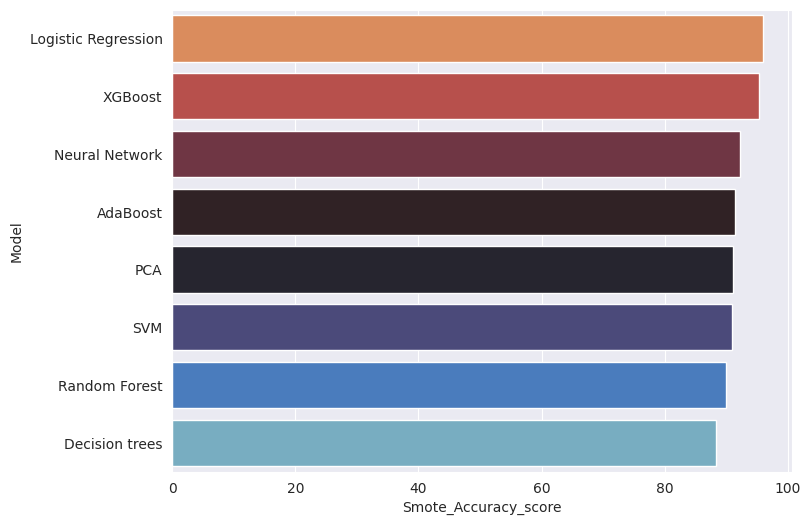

In [159]:
models = pd.DataFrame({
    'Model':['Decision trees', 'Logistic Regression', 'Random Forest', 'PCA', 'AdaBoost', 'SVM',  'XGBoost','Neural Network'],
    'Accuracy_score' : [dt, lr, rf, pca, ada, svm, xgb,nn],
    'Smote_Accuracy_score' : [dt_smote, lr_smote, rf_smote, pca_smote, ada_smote, svm_smote, xgb_smote,nn_smote]
})
sns.barplot(x='Smote_Accuracy_score', y='Model', palette='icefire_r',data=models.sort_values(by='Smote_Accuracy_score',
                                                                         ascending=False, ignore_index=True))

models.sort_values(by='Smote_Accuracy_score', ascending=False, ignore_index=True)

All the models are giving very good performance and their accuracy seems to be very close to each other with XGBoost Leading in terms of performance. After applying SMOTE ENN the models performance jumps up significantly. XGBoost are giving us one of the top model performances. Hence we will be going to use XGBoost as our model for predicting Customer Churn. Lets create a pickle now and store our model in it.

In [160]:
import pickle
# Lets dump our Random Forests model
pickle.dump(model_xgb_smote, open('model.pkl','wb'))

In [161]:
load_model2=pickle.load(open('model.pkl','rb'))
load_model2.score(Xr_test,yr_test)

0.9690927218344965

In [162]:
model_xgb_smote.predict_proba(Xr_test)

array([[9.9997556e-01, 2.4445579e-05],
       [8.3684921e-05, 9.9991632e-01],
       [9.0185738e-01, 9.8142616e-02],
       ...,
       [9.9994123e-01, 5.8750382e-05],
       [9.8431849e-01, 1.5681509e-02],
       [8.3295107e-03, 9.9167049e-01]], dtype=float32)

We can also predict on the entire dataset to calculate the probability of churning by using our model to predict the Churn. After that you can use Power BI to visualize beautiful graphs and bar charts containing all the information in a concise way.
<a href="https://github.com/VineetDabholkar2002/Customer-Churn-Predictor">Github Repo link containing Power BI Dashboard</a>

In [163]:
# For Power BI predictions
telco_pred= pd.read_csv(path)
telco_pred['TotalCharges']=pd.to_numeric(df_base['TotalCharges'],errors='coerce') #coerce puts NaN values if there are any parsing errors
telco_pred.dropna(inplace=True)
pred=model_xgb_smote.predict_proba(X)[:,1]*100
telco_pred['Predictions']=pred
telco_pred.to_csv('Telco-Churn-Predictions.csv')

## PowerBI Dashboard
a) Churners Profile
  <br>
<img src="https://user-images.githubusercontent.com/93699671/179417974-e5d0011f-040c-424e-bca1-3e0697cb0953.png" width=70%>
  
  
b) Churn Risks for each customer (Predicted using XGBoost model)
  <br>
<img src="https://user-images.githubusercontent.com/93699671/183242005-e3168178-b1b0-47b5-ac87-8f4a49151358.png" width=70%>

#### We have now successfully built a model by choosing XGBoost to predict Customer Churn. Using the predictor you will find that the predictions made by our model will match with our EDA we have done previously.

#### You can now easily host the predictor on Heroku by making use of the model.pkl file and even create a beautiful dashboard using PowerBI.

### <i>Thanks for reading !!! I wish you the best of luck in your future endeavors !!!<i>
